# Ejercicio: web scraping con Python

En este ejercicio vas a hacer [scraping](https://es.wikipedia.org/wiki/Web_scraping) de unas cuantas páginas de productos de [Amazon España](https://www.amazon.es/).

El scraping consiste en utilizar una herramienta informática (como puede ser un lenguaje de programación) para extraer datos de una página web de forma automática. Básicamente utiliza [peticiones HTTP](https://es.wikipedia.org/wiki/Hypertext_Transfer_Protocol) para "pedir" una página web de forma similar a como haríamos con un navegador web (como Firefox, Chrome o Internet Explorer). Una vez hecha dicha petición, extrae la información que nos interesa y la guarda (en un archivo o en una base de datos).

Lo primero que necesitamos es una biblioteca capaz de hacer estas peticiones HTTP, es decir: que se conecte a la página web que queremos, y nos "traiga" a Python el contenido de dicha web.

Para este ejercicio vamos a utilizar la página web de Amazon de esta bicicleta de montaña: https://www.amazon.es/Moma-Bicicleta-Mountainbike-aluminio-suspensi%C3%B3n/dp/B00VXE2JCY/ref=lp_2929469031_1_1?s=sports&ie=UTF8&qid=1465237289&sr=1-1

## Pide HTTP con `Requests`

Python incluye en la biblioteca estándar algunas utilidades para hacer peticiones HTTP. Un ejemplo es [`urllib`](https://docs.python.org/3/library/urllib.html). No obstante, se trata de una biblioteca bastante complicada para algo tan sencillo como pedir páginas web. 

Por eso mismo vamos a utilizar una biblioteca mucho más sencilla y potente: [`requests`](http://docs.python-requests.org/en/master/). Requests no es parte de la bilbioteca estándar, sino que debe ser instalada. No obstante, la distribución de Python Anaconda (la que utilizamos para este curso) la trae preinstalada; así que no tenemos que hacerlo.

De todos modos es muy fácil de instalar. No tendríamos más que hacer:

```sh
$ pip install requests
```

La [documentación de Requests](http://docs.python-requests.org/en/master/#the-user-guide) es explícita, liviana y entretenida de leer. Sin más dilación, importemos la biblioteca:

In [3]:
# Importa aquí la bilbioteca requests:
import requests

Una vez importada, Requests debe "pedir" una página web (en este caso https://www.amazon.es/Moma-Bicicleta-Mountainbike-aluminio-suspensi%C3%B3n/dp/B00VXE2JCY/ref=lp_2929469031_1_1?s=sports&ie=UTF8&qid=1465237289&sr=1-1). Solo tenemos que decirle a Requests que haga lo que se llama *una petición HTTP GET*. Los dos tipos básicos de peticiones en web son las [HTTP GET y las HTTP POST](http://www.w3schools.com/tags/ref_httpmethods.asp). En este caso, puesto que no queremos "subir" nada, sino recibir, haremos una HTTP GET con Requests.

Además, ciertas peticiones deben llevar algo de información adicional, lo que se conoce como [cabeceras](https://es.wikipedia.org/wiki/Cabeceras_HTTP) o *headers*, que son pares clave-valor. Para el caso de Amazon España, necesitamos decirle a sus servidores web que *somos un navegador normal y corriente, y no la biblioteca `requests` de Python*. Si no lo hacemos, Amazon nos bloqueará el contenido :(

Para ello, necesitamos añadir una cabecera que sea de la siguiente forma: como clave `"User-Agent"`, y como valor `"Mozilla/5.0"` (para *hacernos pasar* por Firefox).

En la [quickstart](http://docs.python-requests.org/en/master/user/quickstart/#make-a-request) puedes informarte sobre lo sencillo que es hacer una petición GET con Requests. Al lío:

In [4]:
# Haz una petición GET de la url de la bicicleta, con el 
# header especificado, y asigna el resultado en una variable 
# llamada peticion_bicicleta:
url='https://www.amazon.es/Moma-Bicicleta-Mountainbike-aluminio-suspensi%C3%B3n/dp/B00VXE2JCY/ref=lp_2929469031_1_1?s=sports&ie=UTF8&qid=1465237289&sr=1-1'
cabecera={"user-agent":"Mozilla/5.0"}
peticion_bicicleta=requests.get(url,headers=cabecera)


Vamos a ver el tipo de nuestra variable `peticion_bicicleta`:

In [5]:
# Imprime con un print el tipo de dato de
# la variable peticion_bicicleta:
print(type(peticion_bicicleta))

<class 'requests.models.Response'>


Es un tipo de dato (una instancia) de la clase [`Response`](http://docs.python-requests.org/en/master/api/#requests.Response). 

Cuando intentamos ver una página web (o dicho de otro modo: hacemos una petición HTTP a dicha página), el servidor de dicha web nos devuelve un [código HTTP de respuesta](https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_de_estado_HTTP). Toca buscar en la documentación si las instancias de la clase `Response` tienen algún atributo (*class*/*instance variable*) o método para saber si la petición era adecuada, y si el contenido nos ha sido devuelto correctamente...

In [6]:
# Imprime con un print el código HTTP de 
# respuesta o Status de peticion_bicicleta:
print(peticion_bicicleta.status_code)

200


Ahora puedes mirar [aquí](https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_de_estado_HTTP) si el código HTTP de respuesta significa algo bueno o algo malo (es decir: si todo ha salido bien o no).

Si ha salido bien, podemos seguir.

Bueno: resulta que una página web no deja de ser código. A pesar de que nosotros vemos la web de forma bonita y llena de imágenes y texto legible, las páginas están escritas en principalmente tres lenguajes: [HTML](https://es.wikipedia.org/wiki/HTML), [CSS](https://es.wikipedia.org/wiki/Hoja_de_estilos_en_cascada) y [Javascript](https://es.wikipedia.org/wiki/JavaScript).

Cuando pedimos una página web con nuestro navegador, éste recibe el código de la página. Una vez recibido, el nevagador "dibuja" o *renderiza* ese código para mostrarnos las páginas web bonitas y radiantes.

`Requests` no hace este útlimo paso: únicamente recibe el código de la página (llamado *código fuente*), con el que vamos a interactuar para hacer nuestro scraping.

Como prueba, vamos a hacer una cosa: vamos a abrir con nuestro navegador web favorito la [página de la bici](https://www.amazon.es/Moma-Bicicleta-Mountainbike-aluminio-suspensi%C3%B3n/dp/B00VXE2JCY/ref=lp_2929469031_1_1?s=sports&ie=UTF8&qid=1465237289&sr=1-1) y vamos a hacer click derecho, por ejemplo, en el título del artículo (*Bicicleta Montaña Mountainbike 26" BTT SHIMANO, aluminio, doble disco y doble suspensión*), y hacemos click en *Inspeccionar elemento*. Debería desplegarse una ventanita donde aparece el código fuente (en HTML principalmente) de esa parte de la página web.

Asimismo, algunos navegadores web nos permiten ver todo el código fuente de la página web en la que estamos: haciendo click derecho en cualquier sitio de ésta es posible que aparezca una opción llamada *Ver código fuente de la página* o algo similar.

`Requests` recibe el código fuente en lo que se llama *el contenido de la respuesta* tras la petición HTTP GET. Igual está disponible con algún atributo/método en `peticion_bicicleta`...




  
  
  
  


  
  














































    <!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">
    <head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
var ue_hob=+new Date();
var ue_id='0JESSHHA8XX1K1KMZ7Q0',
ue_csm = window,
ue_err_chan = 'jserr-rw',
ue = {};
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){if(1==window.ueinit)try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);

ue.stub(ue,"log");ue.stub(ue,"onunload");ue.stub(ue,"onflush");

(function(c,d){function e(f,b){if(!(a.ec>a.mxe)&&f){a.ec++;a.ter.push(f);b=b||{};var c=f.logLevel||
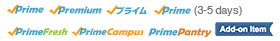
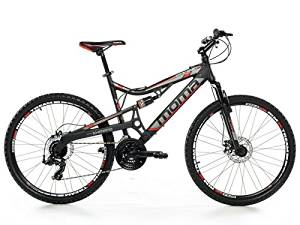

In [7]:
# Imprime el código fuente de la página web
# de la bici. Va a ser largo, pero no pasa nada.
# Es posible que aparezca muchísimo espacio en
# blanco, pero no pasa nada: el código fuente
# de la página es el que es.
# Para ello, crea una nueva variable llamada
# codigo_fuente_bicicleta, y asígnale el 
# valor del código fuente recogido por Requests:

codigo_fuente_bicicleta=peticion_bicicleta.text

print(codigo_fuente_bicicleta)

Ahí está todo: todo el texto, todas las imágenes... Todo. De ahí ahora seleccionaremos las partes que nos interesan, que van a ser los comentarios del producto.

## Preciosa sopa

Vamos a ver el tipo de dato que es `codigo_fuente_bicicleta`:

In [9]:
# Haz un print del tipo de dato de
# codigo_fuente_bicicleta:
print(type(codigo_fuente_bicicleta))

<class 'str'>


Un string de Python normal y corriente. Eso está bien: probablemente sea fácil extraer la información que queremos de ese caos de código HTML, CSS y Javascript...

... Sí lo es. Afortunadamente, existe una biblioteca muy famosa para hacer web scraping llamada [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). `BeautifulSoup` cogerá este código fuente y nos permitirá extraer lo que necesitamos de forma sencilla.

`BeautifulSoup` es una biblioteca de terceros, así que será necesario instalarla. No obstante, de nuevo: Anaconda la trae instalada para nosostros. Así que podemos empezar a usarla directamente. Para ver cómo importarla igual te viene bien mirar un poco el [*quickstart*](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start) que los desarrolladores de la biblioteca han preparado...

In [10]:
# Importa BeautifulSoup
from bs4 import BeautifulSoup

Para que `BeautifulSoup` sea capaz de "analizar por nosotros" el código de la web es necesario crear una instancia de la clase `BeautifulSoup`. Dicha instancia debe ser creada con dos argumentos posicionales:

1. El primero deber ser el código fuente de la web en string (¡lo tenemos!)
2. El segundo ha de ser un string que le diga a `BeautifulSoup` el *parser* (o procesador) a utilizar. La biblioteca puede utilizar [unos cuantos](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser). Nosotros utilizaremos el `"html.parser"`.

Manos a la obra.

In [11]:
# Crea una instancia de BeautifulSoup
# llamada bici_bs:
bici_bs=BeautifulSoup(codigo_fuente_bicicleta,"html.parser")

`bici_bs` es una instancia de `BeautifulSoup`, lista para "darnos lo que le pidamos" de todo el código fuente de la página web.

Ahora solo queda decirle qué queremos...

Esta parte es más complicada si no sabes HTML, así que iremos despacio:

HTML es un lenguaje de marcas. Los elementos que podemos ver en una página web (como son títulos, párrafos, imágenes...) tienen nombres definidos. Por ejemplo:

+ Los títulos grandes son `h1`
+ Un párrafo es `p`
+ Una imagen es `img`

La tónica es casi siempre la misma: en HTML debemos "meter" el contenido de un elemento entre *marcas*. Por ejemplo, para hacer un título sería:

```html
<h1>Esto es un título.</h1>
```

Ponemos `<h1>` al principio, para indicar que comienza un título; y `</h1>` al final para decir que ahí termina. Otro elemento común son los `<div>`, que permiten "agrupar" varios elementos en un bloque. Por ejemplo:

```html
<div>
    <h1>Esto es un título</h1>
    <p>Y esto un párrafo. Y ambos están dentro de un div</p>
</div>
```

A los señores desarrolladores de la web de Amazon España les gusta mucho utilizar otro elemento de HTML llamado `<span>`, que es similar a `<p>`. Lo veremos cuando analicemos el código fuente de los comentarios de la bici.

Los elementos de HTML pueden tener dos cosas llamadas `id` y `class`. Esto permite a los propios desarrolladores poner algo de orden dentro de lo que es el caos de las páginas web modernas. Por ejemplo: una página como la de la bici tiene cientos de `<span>` y párrafos...

Pues bien, cada elemento puede (o debería al menos) tener un `id` único si queremos que sea diferenciable del resto de elementos del mismo tipo. Gracias a esto, podemos diferenciar (tanto nosotros como los ordenadores):

```html
<p id="comentario_1">Primer comentario</p>
```

De:

```html
<p id="comentario_2">Otro comentario</p>
```

Asimismo, elementos "similares" o del mismo estilo/aspecto suelen tener una misma `class` (no confundir con las clases de Python):

```html
<h1 class="titulo_grande">Un título</h1>
```
Y: 

```html
<h1 class="titulo_grande">Otro título</h1>
```

Pueden ser seleccionados fácilmente diciéndole a `BeautifulSoup`: *quiero todos los elementos de tipo `h1` que sean de `class="título_grande"`*.

Vamos a nuestro navegador favorito a "analizar a mano" un poco del código HTML de la página de la bici. Nos vamos a la sección de *Principales opiniones de clientes*, y hacemos click derecho justo en esa frase. Cuando se despliegue, hacemos click en *Inspeccionar elemento*.

En la consolita que se abre, podremos ver que ese *Principales opiniones de clientes* es un elemento de HTML tal que:

```html
<h3 class="a-spacing-small">Principales opiniones de clientes</h3>
```

Es un título de tamaño medianito (`h3` es más pequeñito que `h1`), y de `class` `"a-spacing-small"`. No sabemos muy bien lo que quiere decir ese nombre de clase, pero su uso tendrá para los desarrolladores de la web...

Si miramos el elemento justo debajo de ese `h3` viene ya lo interesante: 

```html
<div id="revMHRL" class="a-section"> 
```

Si nuestro navegador nos "subraya" qué es cada elemento, podrás ver que ese `div` engloba todos los comentarios; que es lo que buscamos... ¡Bingo!

Me pregunto si será también así en la página de otros productos de Amazon... Vamos a ver en otra al azar: por ejemplo [esta](https://www.amazon.es/WD-Elements-Disco-externo-port%C3%A1til/dp/B00CRZ2PRM/ref=lp_937903031_1_2?s=computers&ie=UTF8&qid=1465243368&sr=1-2).

Pues también. Exactamente igual. `<div id="revMHRL" class="a-section">` parece ser constante en los comentarios de todos los productos.

Nosotros ya hemos trabajado. Ahora es el turno de BeautifulSoup. Resulta que cualquier instancia de `BeautifulSoup` tiene el método [`.find()`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find) que permite buscar cualquier tipo de elemento HTML, y se queda con la primera ocurrencia. Este método toma como argumentos interesantes:

1. Un posicional, que es un string con el nombre del elemento a buscar (como pueden ser `"h1"`, `"p"` o `"div"`).
2. Un argumento opcional llamado `id`, que casualmente permite especificar más en la búsqueda; buscando solo elementos con el `id` especificado como string.
3. Otro argumento opcional llamado `class_` (así con barra baja para diferenciarlo de la keyword `class` que sirve para definir clases en Python). Al igual que `id`, permite limitar la búsqueda a los elementos del HTML que tengan dicha `class`.

Por ejemplo: si queremos buscar el primer elemento `h2` que tenga `id="123"` y `class="front-title-spacing"`, haríamos:

```python
mi_instancia_de_BeatutifulSoup.find("h2", id="123", class_="front-title-spacing")
```

Probemos pues a buscar:

```html
<div id="revMHRL" class="a-section">
```

En nuestra instancia `bici_bs`:

In [15]:
# Utiliza el método .find() para 
# buscar el elemento de HTML que buscamos,
# que es el div que contiene los comentarios
# del producto. Guarda el resultado en una
# variable llamada bici_comentarios:
bici_comentarios=bici_bs.find("div", id="revMHRL", class_="a-section")

¿Qué tipo de dato será `bici_comentarios`?

In [21]:
# Imprime el tipo de dato de
# bici_comentarios:
print(type(bici_comentarios))


<class 'bs4.element.Tag'>


Es un `Tag` de `BeautifulSoup`. Básicamente: la versión ya filtrada del código fuente de la página, que solo contiene la parte que queremos.

Vamos a hacer un `print()` de `bici_comentarios`; a ver qué sale...

In [17]:
print(bici_comentarios)

<div class="a-section" id="revMHRL">
<div class="a-section celwidget" id="rev-dpReviewsMostHelpfulAUI-R3IL1EUOKMYI7J"><div class="a-row a-spacing-micro"><div class="a-icon-row a-spacing-none"><a class="a-link-normal a-text-normal a-color-base" href="https://www.amazon.es/review/R3IL1EUOKMYI7J/ref=cm_cr_dp_title/256-6502770-4510241?ie=UTF8&amp;ASIN=B00VXE2JCY&amp;channel=detail-glance&amp;nodeID=2454136031&amp;store=sports" title="5.0 de un máximo de 5 estrellas"><i class="a-icon a-icon-star a-star-5"><span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span></i></a><span class="a-letter-space"></span><a class="a-link-normal a-text-normal a-color-base" href="https://www.amazon.es/review/R3IL1EUOKMYI7J/ref=cm_cr_dp_title/256-6502770-4510241?ie=UTF8&amp;ASIN=B00VXE2JCY&amp;channel=detail-glance&amp;nodeID=2454136031&amp;store=sports"><span class="a-size-base a-text-bold">Perfecta</span></a></div><span class="a-color-secondary">
<span class="a-size-normal">
<span class="a-color-second

Todo el contenido de ese `div`, de principio a fin. Hemos filtrado mucho; pero aún nos queda para tener los datos que nos interesan.

En cada uno de los comentarios queremos quedarnos con:

+ El número de estrellas que el usuario le ha dado a la bici.
+ El texto del comentario como tal. 

En este ejercicio vamos a ignorar el resto de información (nombre del autor del comentario, fecha y demás). ¡Siéntete libre de intentar extraerlos!

Para obtenerlos nos va a tocar volver a inspeccionar manualmente la página web. Cogemos nuestro navegador web de nuevo, y miramos la línea justo debajo de la del `div` que contiene todas las reviews (la que hemos extraído). Resulta que esta línea es:

```html
<div id="rev-dpReviewsMostHelpfulAUI-R3OPV4MMNFN5TL" class="a-section celwidget">
```

Y contiene toda la primera review. 

Tras un poco más de exploración más hacia abajo en el HTML, veremos que la segunda review empieza así:

```html
<div id="rev-dpReviewsMostHelpfulAUI-R2D7IR9OSW311H" class="a-section celwidget">
```

Y la tercera:

```html
<div id="rev-dpReviewsMostHelpfulAUI-RJ3R59PME5TTI" class="a-section celwidget">
```

Podemos ver un par de patrones claros:

+ Los `id` empiezan por `"rev-dpReviewsMostHelpfulAUI"`
+ La `class` de cada uno es siempre la misma: `"a-section celwidget"`

Utilizar el segundo patrón debería ser sencillo. Si sale bien, podremos obtener todas las reviews ya de forma individual (separadas unas de otras).

Además de `.find()` (que solo busca la primera ocurrencia que encaje), las instancias tanto de `BeautifulSoup` como de `Tag` tienen el método `.find_all()`. Este método funciona exactamente igual que `.find()`, pero con la diferencia de que busca todos los elementos que satisfacen la búsqueda; y los devuelve en una lista de Python.

Probemos entonces a buscar en función del segundo patrón.

In [29]:
# Utiliza el método .find_all() sobre
# bici_comentarios para obtener una lista
# con todos div con un comentario cada uno,
# y llama a dicha lista bici_comentarios_lista:
import re
bici_comentarios_lista=bici_comentarios.find_all("div", id=re.compile("rev-dpReviewsMostHelpfulAUI"), class_="a-section celwidget")

La página de la bici tiene 8 comentarios (como podrás ver en tu navegador). Dependiendo de cuándo hagas la práctica, es posible que tenga más (o menos, si alguien ha borrado alguno) ¿Qué longitud tiene nuestra `bici_comentarios_lista`?

In [81]:
# Comprueba la longitud de 
# bici_comentarios_lista:
print(len(bici_comentarios_lista))


8


Buena señal. Pero aún tenemos que filtrar más en cada uno de esos comentarios...

Misma historia. Toca hacer trabajo manual. Queremos extraer el número de estrellas y el cuerpo del comentario. Comencemos por las estrellas.

Vamos al navegador y hacemos click derecho en las estrellitas, e inspeccionamos elemento. Veremos que por ahí pone:

```html
<span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span>
```

Y si miramos otras reviews, veremos que el patrón es constante: podemos sacar ese texto buscando elementos de tipo `span` con `class=a-icon-alt`. De nuevo, con el método `.find()` debería bastar. Eso sí: tenemos que hacerlo en cada uno de los comentarios. 

¿Aplicar la misma acción o transformación a todos los elementos de una colección/iterable? Me suena eso...

In [75]:
# Quizás puedas usar una función map() o
# una list comprehension para extraer ese 
# elemento de nuestras reviews, que están en
# la lista bici_comentarios_lista... O igual un for...
# Mete el resultado en una variable que se llame
# estrellas_bici_lista:

estrellas_bici_lista=[elemento.find("span", class_="a-icon-alt") for elemento in bici_comentarios_lista] #find, no find_all !!!!
       

Probemos a imprimir `estrellas_bici_lista`:

In [77]:
# Imprime estrellas_bici_lista:

print(estrellas_bici_lista)


[<span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">4.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">4.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">3.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">5.0 de un máximo de 5 estrellas</span>, <span class="a-icon-alt">4.0 de un máximo de 5 estrellas</span>]


Tenemos las estrellas. Pero nos sobra cosa ahí: queremos quedarnos únicamente con las estrellas, como números `float` (porque así lo deseo). Todo el demás texto nos sobra.

Una vez que hemos aislado con `BeautifulSoup` el elemento que queremos, podemos utilizar el método `.get_text(" ")` para quedarnos con el texto en bruto (le pasamos como argumento un string con un espacio en blanco para que nos separe bien los párrafos). De nuevo, queremos hacerlo para las estrellas de cada una de las reviews...

In [83]:
# Aplica .get_text() en todos los elementos de
# estrellas_bici_lista, y el resultado guárdalo
# en una variable llamada estrellas_bici_lista_solotexto:

estrellas_bici_lista_solotexto=[element.get_text(" ") for element in estrellas_bici_lista]
# E imprime dicha variable:
for el in estrellas_bici_lista_solotexto:
    print(el)

5.0 de un máximo de 5 estrellas
5.0 de un máximo de 5 estrellas
5.0 de un máximo de 5 estrellas
4.0 de un máximo de 5 estrellas
4.0 de un máximo de 5 estrellas
3.0 de un máximo de 5 estrellas
5.0 de un máximo de 5 estrellas
4.0 de un máximo de 5 estrellas


Casi las tenemos. Solo nos queda quitar el `"de un máximo de 5 estrellas"`. Hacer slicing de cada string podría ser la solución. Con hacer un slice desde el inicio hasta el cuarto caracter debería valer...

In [104]:
# Aplica una transformación en 
# cada elemento de estrellas_bici_lista_solotexto,
# que se haga el slicing adecuado para que se quede
# solo con el número (por ejemplo: "5.0").
# Asigna el resultado a una variable que se llame
# numero_estrellas_bici_lista:
numero_estrellas_bici_lista=[]
for ele in estrellas_bici_lista_solotexto:
    numero_estrellas_bici_lista.append(float(ele[0:3])) # float para convertir el texto "5.0" a numeric y poder hacer estadísticas si se desea.

# E imprime el resultado:
print(numero_estrellas_bici_lista)

[5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 5.0, 4.0]


Tenemos las estrellas. Gracias a que las listas de Python son colecciones ordenadas, sabemos que el primer número de estrellas es del primer comentario, el segundo del segundo, etcétera.

Ahora, misma historia para el cuerpo del texto de cada comentario. Analizar manualmente, extraer el patrón que permita a `BeautifulSoup` buscar lo que queremos, y aplicar los `.find`, `.find_all`, `.get_text()` y demás transformaciones necesarias para extraer el texto.

Recuerda que en `bici_comentarios_lista` tenemos ya una lista con el cuerpo entero de todo lo que hay en cada comentario. Queda filtrar de nuevo a partir de ahí; solo que buscando el texto de cada comentario y no las estrellas.

In [94]:
# ¡Tu turno! Consigue quedarte con el
# texto de cada review. Utiliza tantas
# líneas de código como necesites.
# Si ves saltos de línea \n en tu resultado
# no te preocupes: luego los limpiaremos.
# Guarda el resultado en una lista (que debería
# tener 6 elementos) llamada texto_comentarios_bici_lista:
texto_comentarios_bici_lista_sucio=[ele.find("div", class_="a-section") for ele in bici_comentarios_lista]
texto_comentarios_bici_lista=[elemento.get_text(" ") for elemento in texto_comentarios_bici_lista_sucio]


In [96]:
# Imprime texto_comentarios_bici_lista:
print(texto_comentarios_bici_lista)

# E imprime su longitud:
print(len(texto_comentarios_bici_lista))

['\n  Compré la bicicleta hace poco y el resultado ha sido impresionante. Va perfectamente, puedes llevarlo por todo tipo de montañas que la rueda se mantiene intacta. Comodísima y fácil de transportar. Calidad precio inmejorable.\n', '\n  Fantástica. Frena muy bien, es muy cómoda, los amortiguadores cumplen su función... La recomiendo, porque su relación calidad-precio es muy buena.\n', '\n  Absolutamente Genial, tanto el producto como la rapidez con la que ha llegado el mismo. Ha tardado dos días en llegar, mucho menos tiempo previsto por el mismo vendedor, y la bicicleta es genial. Un poco dificil quitar la protección de la rueda delantera, que es lo único que hay que armar, pero es insignificante cuando pruebas la bici. Se nota que hay que rodarla (sobretodo en frenos y también en cambios) pero los acabados son muy buenos y las sensaciones muy positivas\n', '\n  Llevo una semana dandole caña y va bastante bien, pero tengo un problema. La rueda trasera no me frena muy bien, tengo qu

Ahora vamos a quitar los `"\n"` de salto de línea. Vemos que salen al principio y al final de cada comentario. Resulta que las strings tienen el método [`.strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip) para estos propósitos :)

In [101]:
# Aplica .strip() a cada comentario
# de texto_comentarios_bici_lista,
# y guarda el resultado en una variable
# llamada texto_comentarios_bici_lista_limpio:
texto_comentarios_bici_lista_limpio=[elem.strip() for elem in texto_comentarios_bici_lista]

# E imprime el resultado:
print(texto_comentarios_bici_lista_limpio)

['Compré la bicicleta hace poco y el resultado ha sido impresionante. Va perfectamente, puedes llevarlo por todo tipo de montañas que la rueda se mantiene intacta. Comodísima y fácil de transportar. Calidad precio inmejorable.', 'Fantástica. Frena muy bien, es muy cómoda, los amortiguadores cumplen su función... La recomiendo, porque su relación calidad-precio es muy buena.', 'Absolutamente Genial, tanto el producto como la rapidez con la que ha llegado el mismo. Ha tardado dos días en llegar, mucho menos tiempo previsto por el mismo vendedor, y la bicicleta es genial. Un poco dificil quitar la protección de la rueda delantera, que es lo único que hay que armar, pero es insignificante cuando pruebas la bici. Se nota que hay que rodarla (sobretodo en frenos y también en cambios) pero los acabados son muy buenos y las sensaciones muy positivas', 'Llevo una semana dandole caña y va bastante bien, pero tengo un problema. La rueda trasera no me frena muy bien, tengo que hacer mucha fuerza p

¡Bien! Tenemos nuestros resultados en dos listas: en una de ellas las estrellas, y en la otra los comentarios. Molaría ahora "unir" ambas listas, teniendo en cuenta que el primer elemento de cada una de ellas es el del primer comentario, el segundo del segundo comentario... 

El objetivo ahora es conseguir una sola lista, donde cada elemento es una tupla que contiene las estrellas y el texto de cada review. ¿Qué función vista en la teoría podríamos usar?

In [105]:
# Une ambas listas en una sola,
# que sea una lista de tuplas estilo
# (estrellas, comentario). Guarda el
# resultado en una variable llamada
# estrellas_y_comentarios_bici:
estrellas_y_comentarios_bici=[(x,y) for x,y in zip(numero_estrellas_bici_lista,texto_comentarios_bici_lista_limpio)]

# E imprime el resultado:
for pareja in estrellas_y_comentarios_bici:
    print(pareja)

(5.0, 'Compré la bicicleta hace poco y el resultado ha sido impresionante. Va perfectamente, puedes llevarlo por todo tipo de montañas que la rueda se mantiene intacta. Comodísima y fácil de transportar. Calidad precio inmejorable.')
(5.0, 'Fantástica. Frena muy bien, es muy cómoda, los amortiguadores cumplen su función... La recomiendo, porque su relación calidad-precio es muy buena.')
(5.0, 'Absolutamente Genial, tanto el producto como la rapidez con la que ha llegado el mismo. Ha tardado dos días en llegar, mucho menos tiempo previsto por el mismo vendedor, y la bicicleta es genial. Un poco dificil quitar la protección de la rueda delantera, que es lo único que hay que armar, pero es insignificante cuando pruebas la bici. Se nota que hay que rodarla (sobretodo en frenos y también en cambios) pero los acabados son muy buenos y las sensaciones muy positivas')
(4.0, 'Llevo una semana dandole caña y va bastante bien, pero tengo un problema. La rueda trasera no me frena muy bien, tengo q

## La vida es más sencilla si metes el código en funciones

Y terminamos. Hemos escrito bastante código para *scrapear* los comentarios y las estrellas de cada review. Estaría bien definir una función que automatizara el proceso. Con un poco de suerte, permitiría scrapear y obtener los resultados directamente de cualquier producto de Amazon España...

Así que vamos a definir una función llamada `scrapear_pagina_amazon`, que toma como argumento posicional `link` (que será el string del link de una página de producto de Amazon), y que devuelve una lista con los pares de estrella-comentario; tal y como hemos hecho para la bici.

In [122]:
# ¡Adelante! Siéntete libre de reutilizar
# tanto código del que has ido escribiendo
# hasta ahora como desees (aunque igual cambiando
# el nombre de las variables para que no sea
# siempre bici_esto, bici_lo_otro):

def escrapear_pagina_amazon(link,header):
    import requests
    from bs4 import BeautifulSoup
    import re
    
    peticion=requests.get(link,headers=header)
    fuente=peticion.text
    producto_bs=BeautifulSoup(fuente,"html.parser")
    comentarios=producto_bs.find("div", id="revMHRL", class_="a-section") # Todo el bloque de comentarios en bruto.
    comentarios_lista=comentarios.find_all("div", id=re.compile("rev-dpReviewsMostHelpfulAUI"), class_="a-section celwidget") # Bloques de comentarios individuales en sucio, es decir, mezclados con código HTML y Javascript.
    
    estrellas=[elemento.find("span", class_="a-icon-alt") for elemento in comentarios_lista] #find, no find_all !!!!
    estrellas_texto=[element.get_text(" ") for element in estrellas] # Texto de puntuaciones limpio de etiquetas HTML.
    estrellas_numero=[]
    for ele in estrellas_texto:
        estrellas_numero.append(float(ele[0:3]))
    
    comentarios_lista_sucio=[ele.find("div", class_="a-section") for ele in comentarios_lista] # Bloques de comentarios individuales en sucio: texto mezclado con Tags HTML.
    comentarios_lista_texto_indentado=[elemento.get_text(" ") for elemento in comentarios_lista_sucio] # Comentarios individuales de solo texto, pero con indentación.
    comentarios_lista_texto_limpio=[elem.strip() for elem in comentarios_lista_texto_indentado] #Comentarios individuales de solo texto en limpio.
    
    estrellas_y_comentarios=[(x,y) for x,y in zip(estrellas_numero,comentarios_lista_texto_limpio)]
    for pareja in estrellas_y_comentarios:
        print(pareja)

Prueba tu función en el link de las bicis (para ver si el resultado es el mismo que obtuviste sin la función):

In [123]:
# ¡Llama a la función y mira si el resultado es el mismo!
escrapear_pagina_amazon(url,cabecera)

(5.0, 'Compré la bicicleta hace poco y el resultado ha sido impresionante. Va perfectamente, puedes llevarlo por todo tipo de montañas que la rueda se mantiene intacta. Comodísima y fácil de transportar. Calidad precio inmejorable.')
(5.0, 'Fantástica. Frena muy bien, es muy cómoda, los amortiguadores cumplen su función... La recomiendo, porque su relación calidad-precio es muy buena.')
(5.0, 'Absolutamente Genial, tanto el producto como la rapidez con la que ha llegado el mismo. Ha tardado dos días en llegar, mucho menos tiempo previsto por el mismo vendedor, y la bicicleta es genial. Un poco dificil quitar la protección de la rueda delantera, que es lo único que hay que armar, pero es insignificante cuando pruebas la bici. Se nota que hay que rodarla (sobretodo en frenos y también en cambios) pero los acabados son muy buenos y las sensaciones muy positivas')
(4.0, 'Llevo una semana dandole caña y va bastante bien, pero tengo un problema. La rueda trasera no me frena muy bien, tengo q

Hemos construido una función que scrapea páginas web de Amazon. Siéntete libre de probar un par más de páginas de productos (que tengan comentarios), a ver si también funciona:

In [124]:
# Llama aquí a la función pasando como argumento otro link de otro
# producto de Amazon España:
url2='https://www.amazon.es/Python-para-informaticos-Explorando-informacion/dp/151708881X/ref=sr_1_1?s=books&ie=UTF8&qid=1477485510&sr=1-1'
escrapear_pagina_amazon(url2,cabecera)

(5.0, 'He aprendido mucho sobre Python con su lectura, muy recomendable para empezar con este lenguaje. Por supuesto hay que seguir aprendiendo más, pero el inicio ha sido muy interesante. Si ya conocías Java o C, te resultará muy fácil aprender Python, cosa que merece la pena. Es un lenguaje que simplifica mucho todo. La traducción al castellano es muy buena, se nota que lo ha hecho alguien que sabe programar.')
(2.0, 'Para personas con nulos conocimientos de programación podría estar bien, tres o cuatro estrellas. Para personas con conocimientos de programación mejor buscar otra opción.')
(5.0, 'Libro muy bien estructurado y claro. Muy buena traduccion. Tanto sino tienes ni idea como si tus conocimientos son básicos, aprenderás algo nuevo al leer este libro. Un libro para guardar. En mi caso confundí la compra al estar interesado en libros sobre Python 3, y en 150 páginas que llevo solo he apreciado dos incompatibilidades, Compra recomendada.')
(3.0, 'El manual en sí está bien. Pero 

In [125]:
# Y con otro producto distinto más:
url3='https://www.amazon.es/Raspberry-Pi-model-sobremesa-Quad-Core/dp/B01CCOXV34/ref=sr_1_5?s=electronics&ie=UTF8&qid=1477485981&sr=1-5'
escrapear_pagina_amazon(url3,cabecera)

(1.0, 'El paquete estaba deteriorado y la caja del producto estaba rota y el mismo producto estaba roto por el puerto micro sd.')
(1.0, 'La foto de esta tarjeta es de la fabricada en UK no en China , hoy he recibido la de China y pretendo cambiarla por la de UK , decirme que se puede hacer , mi hijo la recibió hace unas semanas y era la de UK porque a mi no se me ha enviado del mismo fabricante , espero vuestras noticias antes de devolverla.')
(5.0, 'Es del  tamaño de una tarjeta de credito. Concentra conexiones de usb, hdmi, micro sd, y esta ediccio con wiifi y bluthooth. Es una chulada. Ideal para crear de forma casera un ambilight, un reproductor de videos por usb o compartirlo por red local, como servidor de archivos, como consola arcade, etc. Hay muchos foros por internet para eso. Me quito el sombrero por lo mucho que se puede hacer con algo tan pequeño. Transporte por Amazon de 10 como siempre.')
(5.0, 'De momento, estoy trabajando con ella en la modalidad multimedia, y para ges

In [128]:
# OPCIONAL.

# A continuación extraigo también los nombres de los que han comentado y las fechas.

comentarios_nombres=[ele.find("a", class_="noTextDecoration") for ele in bici_comentarios_lista]
print(comentarios_nombres)

[<a class="noTextDecoration" href="/gp/pdp/profile/AO0C5NH6HVQDF/ref=cm_cr_dp_pdp/256-6502770-4510241">Rocíol89</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A1DFS5JYWXEO1I/ref=cm_cr_dp_pdp/256-6502770-4510241">Cliente Amazon</a>, <a class="noTextDecoration" href="/gp/pdp/profile/AD9ACSCMG0M1A/ref=cm_cr_dp_pdp/256-6502770-4510241">Daniel M.</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A3K56HMS9EFHZR/ref=cm_cr_dp_pdp/256-6502770-4510241">Alin</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A30NRCO5ECGJQN/ref=cm_cr_dp_pdp/256-6502770-4510241">Cliente Amazon</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A2OEH9M9JO6OE3/ref=cm_cr_dp_pdp/256-6502770-4510241">Armando</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A1W6ORJPRBB9F6/ref=cm_cr_dp_pdp/256-6502770-4510241">max</a>, <a class="noTextDecoration" href="/gp/pdp/profile/A8RILL3DOXBI7/ref=cm_cr_dp_pdp/256-6502770-4510241">Roberto Pérez Pérez</a>]


In [130]:
comentarios_nombres_texto=[elem.get_text(" ") for elem in comentarios_nombres]
for autor in comentarios_nombres_texto:
    print(autor)

Rocíol89
Cliente Amazon
Daniel M.
Alin
Cliente Amazon
Armando
max
Roberto Pérez Pérez


In [132]:
comentarios_fechas=[fecha.find("span",class_="a-color-secondary",string=re.compile("en")) for fecha in bici_comentarios_lista]
print(comentarios_fechas)

[<span class="a-color-secondary"> en 14 de febrero de 2016</span>, <span class="a-color-secondary"> en 23 de diciembre de 2015</span>, <span class="a-color-secondary"> en 14 de diciembre de 2015</span>, <span class="a-color-secondary"> en 30 de agosto de 2016</span>, <span class="a-color-secondary"> en 10 de septiembre de 2016</span>, <span class="a-color-secondary"> en 27 de mayo de 2016</span>, <span class="a-color-secondary"> en 31 de diciembre de 2015</span>, <span class="a-color-secondary"> en 18 de julio de 2016</span>]


In [133]:
comentarios_fechas_texto=[elemento.get_text(" ") for elemento in comentarios_fechas]
for linea in comentarios_fechas_texto:
    print(linea)

 en 14 de febrero de 2016
 en 23 de diciembre de 2015
 en 14 de diciembre de 2015
 en 30 de agosto de 2016
 en 10 de septiembre de 2016
 en 27 de mayo de 2016
 en 31 de diciembre de 2015
 en 18 de julio de 2016


In [135]:
comentarios_fechas_solo=[]
for ele in comentarios_fechas_texto:
    comentarios_fechas_solo.append(ele[3:]) # Se elimina la preposición 'en'.

for date in comentarios_fechas_solo:
    print(date)

 14 de febrero de 2016
 23 de diciembre de 2015
 14 de diciembre de 2015
 30 de agosto de 2016
 10 de septiembre de 2016
 27 de mayo de 2016
 31 de diciembre de 2015
 18 de julio de 2016


In [138]:
# Ahora modifico mi función de scraping añadiendo nombres y fechas:

def escrapear_pagina_amazon(link,header):
    import requests
    from bs4 import BeautifulSoup
    import re
    
    peticion=requests.get(link,headers=header)
    fuente=peticion.text
    producto_bs=BeautifulSoup(fuente,"html.parser")
    comentarios=producto_bs.find("div", id="revMHRL", class_="a-section") # Todo el bloque de comentarios en bruto.
    comentarios_lista=comentarios.find_all("div", id=re.compile("rev-dpReviewsMostHelpfulAUI"), class_="a-section celwidget") # Bloques de comentarios individuales en sucio, es decir, mezclados con código HTML y Javascript.
    
    estrellas=[elemento.find("span", class_="a-icon-alt") for elemento in comentarios_lista] #find, no find_all !!!!
    estrellas_texto=[element.get_text(" ") for element in estrellas] # Texto de puntuaciones limpio de etiquetas HTML.
    estrellas_numero=[]
    for ele in estrellas_texto:
        estrellas_numero.append(float(ele[0:3]))
    
    comentarios_lista_sucio=[ele.find("div", class_="a-section") for ele in comentarios_lista] # Bloques de comentarios individuales en sucio: texto mezclado con Tags HTML.
    comentarios_lista_texto_indentado=[elemento.get_text(" ") for elemento in comentarios_lista_sucio] # Comentarios individuales de solo texto, pero con indentación.
    comentarios_lista_texto_limpio=[elem.strip() for elem in comentarios_lista_texto_indentado] #Comentarios individuales de solo texto en limpio.
    
    comentarios_nombres=[ele.find("a", class_="noTextDecoration") for ele in comentarios_lista]
    comentarios_nombres_texto=[elem.get_text(" ") for elem in comentarios_nombres]

    comentarios_fechas=[fecha.find("span",class_="a-color-secondary",string=re.compile("en")) for fecha in comentarios_lista]
    comentarios_fechas_texto=[elemento.get_text(" ") for elemento in comentarios_fechas]
    comentarios_fechas_solo=[]
    for ele in comentarios_fechas_texto:
        comentarios_fechas_solo.append(ele[3:]) # Se elimina la preposición 'en'.
    
    estrellas_y_comentarios=[(x,y,z,t) for x,y,z,t in zip(estrellas_numero,comentarios_nombres_texto,comentarios_fechas_solo,comentarios_lista_texto_limpio)]
    for terna in estrellas_y_comentarios:
        print(terna)

In [139]:
# Resultado con los cuatro campos:

escrapear_pagina_amazon(url,cabecera)

(5.0, 'Rocíol89', ' 14 de febrero de 2016', 'Compré la bicicleta hace poco y el resultado ha sido impresionante. Va perfectamente, puedes llevarlo por todo tipo de montañas que la rueda se mantiene intacta. Comodísima y fácil de transportar. Calidad precio inmejorable.')
(5.0, 'Cliente Amazon', ' 23 de diciembre de 2015', 'Fantástica. Frena muy bien, es muy cómoda, los amortiguadores cumplen su función... La recomiendo, porque su relación calidad-precio es muy buena.')
(5.0, 'Daniel M.', ' 14 de diciembre de 2015', 'Absolutamente Genial, tanto el producto como la rapidez con la que ha llegado el mismo. Ha tardado dos días en llegar, mucho menos tiempo previsto por el mismo vendedor, y la bicicleta es genial. Un poco dificil quitar la protección de la rueda delantera, que es lo único que hay que armar, pero es insignificante cuando pruebas la bici. Se nota que hay que rodarla (sobretodo en frenos y también en cambios) pero los acabados son muy buenos y las sensaciones muy positivas')
(4

El scraping web es una herramienta poderosa (y tediosa; todo sea dicho) para obtener datos de Internet cuando no están disponibles en bases de datos o APIs fáciles de usar. De hecho [hay empresas que se dedican exclusivamente a esto](http://scrapinghub.com/); y las herramientas que utilizan son exactamente las mismas que has utilizado en este ejercicio (`Requests` y `BeautifulSoup`); aunque hay una más...

[`Scrapy`](http://scrapy.org/) es un scraper igual que `BeautifulSoup`, pero también es un [*web crawler*](https://en.wikipedia.org/wiki/Web_crawler) o *web spider*. 

Un *crawler* es un programa que no solo extrae aquello que queremos de una página (scraping), sino que también se encarga de buscar las propias páginas. Por ejemplo: a un crawler escrito con `Scrapy` le podríamos pasar un dominio (como puede ser Amazon.es), y él solo se encargaría de "meterse" en todas las páginas de productos de Amazon, utilizando luego `BeautifulSoup` para *scrapear* y extraer los datos que queremos de cada una de ellas. *Aviso:* `Scrapy` no funciona todavía con Python 3. Solo funciona con Python 2 debido a que utiliza una biblioteca llamada [`Twisted`](https://twistedmatrix.com/trac/) que no es compatible con Python 3.

`Scrapy` es una biblioteca algo más complicada. Pero teniendo su [documentación](http://doc.scrapy.org/en/latest/) y algo de paciencia, no deberías tener demasiados problemas para conseguir tus propósitos :)